# Inaugural Project

Imports and set magics:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

# Question 1

## Introduction
We will import the py-file that models the exchange economy with two consumers and given parameters. Our goal is to find pairs of $x_1^A$ and $x_2^A$ that leave both consumers at least as well off as their initial endowment. This analysis will help us identify Pareto improvements, ensuring that the new allocations benefit at least one consumer without making the other worse off. This is done on a sample size of 75.

In [16]:
#Importing the py-file for the exchange economy
from inauguralproject import InauguralprojectClass
model = InauguralprojectClass()

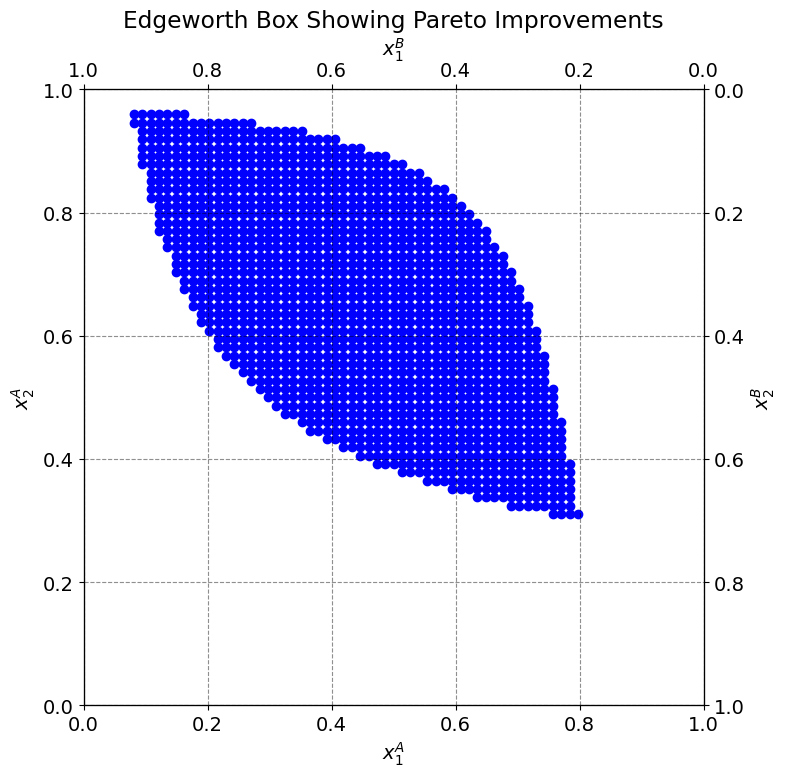

In [23]:
# Sample size and grid values
N = 75
x_grid = np.linspace(0, 1, N)

# Initial utility for consumer A and B
uA_initial = model.utility_A(model.w1A, model.w2A)
uB_initial = model.utility_B(model.w1B, model.w2B)

pareto_set = []
# Loop for possible pareto improvements
for xA1 in x_grid:
    for xA2 in x_grid:
        xB1 = 1 - xA1
        xB2 = 1 - xA2
        
        
        uA_new = model.utility_A(xA1, xA2)
        uB_new = model.utility_B(xB1, xB2)
        
        
        if uA_new >= uA_initial and uB_new >= uB_initial:
            pareto_set.append((xA1, xA2))

# Pareto improvements defined for consumer A
pareto_xA1, pareto_xA2 = zip(*pareto_set) if pareto_set else ([], [])

# Plotting Edgeworth Box with pareto improvements for consumer A
plt.figure(figsize=(8, 8))
plt.scatter(pareto_xA1, pareto_xA2, color='blue', label='Pareto Improvements for A')
# Axis labels and values
plt.xlabel('$x_1^A$')
plt.ylabel('$x_2^A$')
plt.xlim(0, 1)
plt.ylim(0, 1)
ax2 = plt.twiny()  
ax3 = plt.twinx()  
ax2.set_xlim(0, 1)
ax3.set_ylim(0, 1)
ax2.set_xlabel('$x_1^B$')
ax3.set_ylabel('$x_2^B$')
ax2.xaxis.set_label_position('top') 
ax3.yaxis.set_label_position('right')
ax2.xaxis.tick_top()
ax3.yaxis.tick_right()
ax2.invert_xaxis()
ax3.invert_yaxis()

plt.title('Edgeworth Box Showing Pareto Improvements')
plt.grid(True)


plt.show()

## Conclusion 
The initial endowments were given as $\omega_1^A = 0.8$, $\omega_2^A = 0.3$, $\omega_1^B = 0.2$, and $\omega_2^B = 0.7$. We aimed to identify allocations $(x_1^A, x_2^A)$ that leave both consumers at least as well off as their initial endowments, thus representing Pareto improvements. 

In the Edgeworth Box, the initial endowment point is located at the far right bottom corner. From this starting point, we conducted a grid search to explore possible allocations of goods for consumer A. For each allocation, we calculated the utility levels for both consumers A and B. We identified allocations where both consumers achieve at least the same utility as their initial endowment. These allocations are visualized as blue points in the Edgeworth Box, representing combinations of $x_1^A$ and $x_2^A$ that shows pareto improvements or the initial endowment allocations.


# Question 2

## Introduction

We use the epsilons defined in py-file to calculate the error in the market clearing conditions. We simulate for different prices for $p_1$ and hereby get different epsilon values. 

In [25]:
# Sample size and p1 value range
N = 75
p1_range = np.linspace(0.5, 2.5, N)

# List for errors in market clearing conditions
errors_1 = []
errors_2 = []

# Loop for errors in market clearing conditions for each p1 value
for p1 in p1_range:
    eps1, eps2 = model.epsilons(p1) 
    errors_1.append(eps1)
    errors_2.append(eps2)

print("Errors in market clearing conditions:")
for i, p1 in enumerate(p1_range):
    print(f"p1 = {p1:.4f}, ε1 = {errors_1[i]:.4f}, ε2 = {errors_2[i]:.4f}")

Errors in market clearing conditions:
p1 = 0.5000, ε1 = 0.5333, ε2 = -0.2667
p1 = 0.5270, ε1 = 0.4752, ε2 = -0.2505
p1 = 0.5541, ε1 = 0.4228, ε2 = -0.2342
p1 = 0.5811, ε1 = 0.3752, ε2 = -0.2180
p1 = 0.6081, ε1 = 0.3319, ε2 = -0.2018
p1 = 0.6351, ε1 = 0.2922, ε2 = -0.1856
p1 = 0.6622, ε1 = 0.2558, ε2 = -0.1694
p1 = 0.6892, ε1 = 0.2222, ε2 = -0.1532
p1 = 0.7162, ε1 = 0.1912, ε2 = -0.1369
p1 = 0.7432, ε1 = 0.1624, ε2 = -0.1207
p1 = 0.7703, ε1 = 0.1357, ε2 = -0.1045
p1 = 0.7973, ε1 = 0.1107, ε2 = -0.0883
p1 = 0.8243, ε1 = 0.0874, ε2 = -0.0721
p1 = 0.8514, ε1 = 0.0656, ε2 = -0.0559
p1 = 0.8784, ε1 = 0.0451, ε2 = -0.0396
p1 = 0.9054, ε1 = 0.0259, ε2 = -0.0234
p1 = 0.9324, ε1 = 0.0077, ε2 = -0.0072
p1 = 0.9595, ε1 = -0.0094, ε2 = 0.0090
p1 = 0.9865, ε1 = -0.0256, ε2 = 0.0252
p1 = 1.0135, ε1 = -0.0409, ε2 = 0.0414
p1 = 1.0405, ε1 = -0.0554, ε2 = 0.0577
p1 = 1.0676, ε1 = -0.0692, ε2 = 0.0739
p1 = 1.0946, ε1 = -0.0823, ε2 = 0.0901
p1 = 1.1216, ε1 = -0.0948, ε2 = 0.1063
p1 = 1.1486, ε1 = -0.1067,

# Question 3

The market clearing price is 0.953


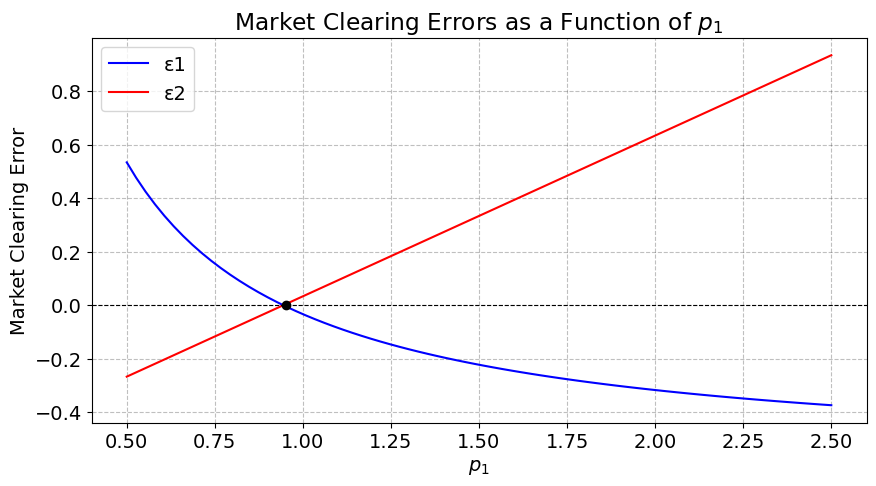

In [6]:
model = InauguralprojectClass() 

N = 75
p1_range = np.linspace(0.5, 2.5, N + 1)

errors_1 = []
errors_2 = []

# Calculate errors for each p1 in range
for p1 in p1_range:
    eps1, eps2 = model.epsilons(p1)
    errors_1.append(eps1)
    errors_2.append(eps2)

# Combine errors to find minimum absolute sum of errors
combined_errors = np.abs(np.array(errors_1)) + np.abs(np.array(errors_2))
min_abs_error_index = np.argmin(combined_errors)
market_clearing_p1 = p1_range[min_abs_error_index]

# Printing the market clearing price
print(f"The market clearing price is {market_clearing_p1:.3f}")

# Plotting the errors
plt.figure(figsize=(10, 5))
plt.plot(p1_range, errors_1, label='ε1', color='blue')
plt.plot(p1_range, errors_2, label='ε2', color='red')
plt.scatter([market_clearing_p1], [0], color='black', zorder=5)  # Mark the minimum error point
plt.title('Market Clearing Errors as a Function of $p_1$')
plt.xlabel('$p_1$')
plt.ylabel('Market Clearing Error')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)
plt.show()

In [7]:
Allocation = model.demand_A(market_clearing_p1)
print(Allocation)

(0.3715617715617715, 0.7084444444444445)


Explain your code and procedure

# Question 4.a+b

Optimal price for Agent A is 1.887, maximizing their utility at 0.634.
Optimal allocation for Agent A is x1A = 0.619, x2A = 0.641.
Optimal price for Agent B is 0.527, maximizing their utility at 0.645.
Optimal allocation for Agent B is x1B = 0.543, x2B = 0.519.


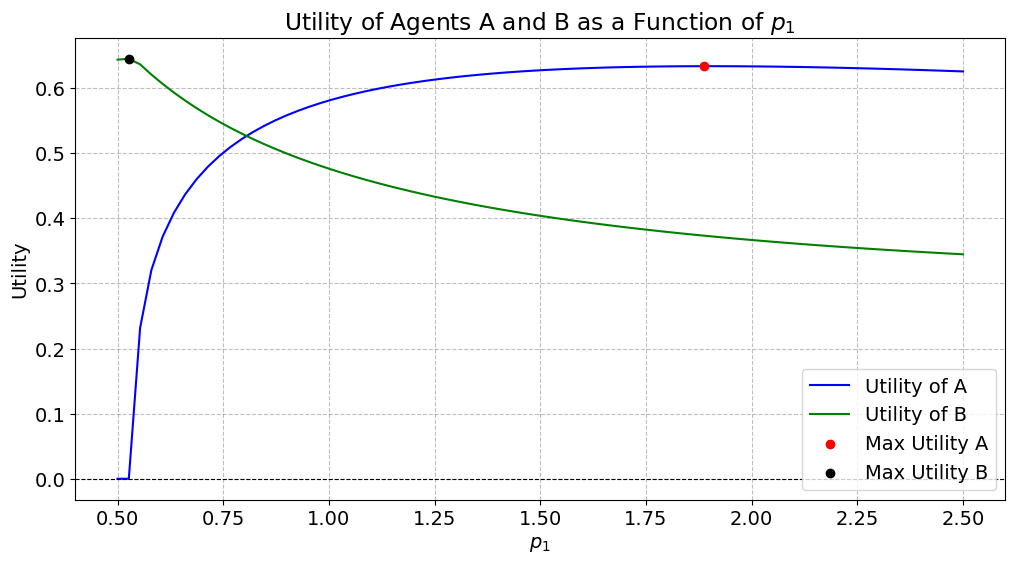

In [8]:
# Initialize the model
model = InauguralprojectClass()

# Define parameters for the price range
N = 75
p1_range = np.linspace(0.5, 2.5, N + 1)
a_utility = []
b_utility = []

# Calculate utilities and demands for each p1, for both agents A and B
for p1 in p1_range:
    # Agent B's demands determine what is left for Agent A
    x1B, x2B = model.demand_B(p1)
    x1B = np.clip(x1B, 0, 1)
    x2B = np.clip(x2B, 0, 1)

    # Agent A's utility is calculated based on what B does not consume
    x1A = 1 - x1B
    x2A = 1 - x2B
    a_utility.append(model.utility_A(x1A, x2A))
    b_utility.append(model.utility_B(x1B, x2B))

# Finding the optimal prices and utilities
max_utility_index_A = np.argmax(a_utility)
optimal_price_A = p1_range[max_utility_index_A]
max_utility_A = a_utility[max_utility_index_A]
optimal_allocation_A = (1 - np.clip(model.demand_B(optimal_price_A)[0], 0, 1), 
                        1 - np.clip(model.demand_B(optimal_price_A)[1], 0, 1))

max_utility_index_B = np.argmax(b_utility)
optimal_price_B = p1_range[max_utility_index_B]
max_utility_B = b_utility[max_utility_index_B]
optimal_allocation_B = (1 - np.clip(model.demand_A(optimal_price_B)[0], 0, 1), 
                        1 - np.clip(model.demand_A(optimal_price_B)[1], 0, 1))

# Print results for both agents
print(f"Optimal price for Agent A is {optimal_price_A:.3f}, maximizing their utility at {max_utility_A:.3f}.")
print(f"Optimal allocation for Agent A is x1A = {optimal_allocation_A[0]:.3f}, x2A = {optimal_allocation_A[1]:.3f}.")
print(f"Optimal price for Agent B is {optimal_price_B:.3f}, maximizing their utility at {max_utility_B:.3f}.")
print(f"Optimal allocation for Agent B is x1B = {optimal_allocation_B[0]:.3f}, x2B = {optimal_allocation_B[1]:.3f}.")

# Plotting the utilities as functions of price p1
plt.figure(figsize=(12, 6))
plt.plot(p1_range, a_utility, label='Utility of A', color='blue')
plt.plot(p1_range, b_utility, label='Utility of B', color='green')
plt.scatter([optimal_price_A], [max_utility_A], color='red', zorder=5, label='Max Utility A')  # Highlight the optimal price for A
plt.scatter([optimal_price_B], [max_utility_B], color='black', zorder=5, label='Max Utility B')  # Highlight the optimal price for B
plt.title('Utility of Agents A and B as a Function of $p_1$')
plt.xlabel('$p_1$')
plt.ylabel('Utility')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)
plt.show()


If any postive price can be used, it can be seen, that our optimal p will go towards infinity, if a boundarie is not set. 

# Question 5.a

In [9]:
model = InauguralprojectClass()

x1A_range = np.linspace(0, 1, 1000)
x2A_range = np.linspace(0, 1, 1000)

max_utility_A = 0
optimal_x1A = None
optimal_x2A = None

def pareto_C(x1A, x2A):
    return model.utility_A(x1A, x2A) >= model.utility_A(model.w1A, model.w2A) and \
        model.utility_B(1 - x1A, 1 - x2A) >= model.utility_B(1 - model.w1A, 1 - model.w2A)

for x1A in x1A_range:
    for x2A in x2A_range:
        if pareto_C(x1A, x2A):
            utility_A_value = model.utility_A(x1A, x2A)
            if utility_A_value > max_utility_A:
                max_utility_A = utility_A_value
                optimal_x1A = x1A
                optimal_x2A = x2A

print(f"The allocation with the highest utility for A in set C is ({optimal_x1A:.3f}, {optimal_x2A:.3f})")
print(f"where the utility for A is {max_utility_A:.3f}")



The allocation with the highest utility for A in set C is (0.570, 0.849)
where the utility for A is 0.743


# Question 5.b

In [10]:
from scipy.optimize import minimize
import numpy as np

initial_utility_B = model.utility_B(model.w1B, model.w2B)

constraints = [
    {'type': 'ineq', 'fun': lambda x: model.utility_B(1-x[0], 1-x[1]) - initial_utility_B}
]

bounds = [(0, 1), (0, 1)]


x0 = [model.w1A, model.w2A]

# Solve the optimization problem for 5b
result = minimize(model.max_u_a, x0, method='SLSQP', bounds=bounds, constraints=constraints)

if result.success:
    optimal_x1A, optimal_x2A = result.x
    optimal_utility = -result.fun  
else:
    optimal_x1A, optimal_x2A, optimal_utility = None, None, None

(optimal_x1A, optimal_x2A), optimal_utility


((0.5757450591663252, 0.8444377866494914), 0.7432276287150864)

Here we see that, by changing the restrictions, the allocation will still be the same. This is because, the constraints are mainly the identical.

# Question 6.a

In [11]:
# Bounds to ensure x1A and x2A are within [0, 1]
bounds_for_6a = [(0, 1), (0, 1)]

x0_for_6a = [0.5, 0.5]

# Solve the optimization problem for 
result_6a = minimize(model.max_u_ab, x0_for_6a, method='SLSQP', bounds=bounds)

if result_6a.success:
    optimal_x1A_6a, optimal_x2A_6a = result_6a.x
    optimal_utility_6a = -(result_6a.fun) 
else:
    optimal_x1A_6a, optimal_x2A_6a, optimal_utility_6a = None, None, None

(optimal_x1A_6a, optimal_x2A_6a), optimal_utility_6a


((0.3334116578920504, 0.666588310103883), 1.058267353366544)

The allocation is, (x1a,x2a)=(0.3334,0.66659) Ua+Ub=1.058

# Question 6.b

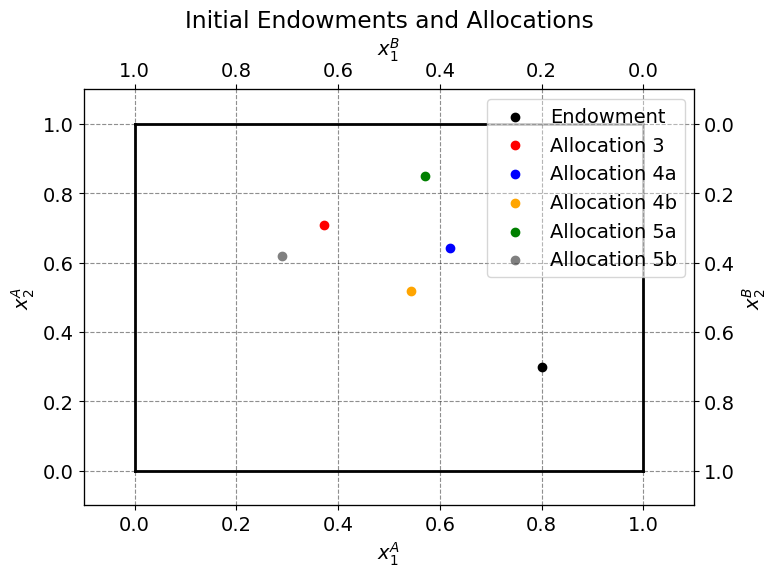

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the InauguralprojectClass is defined elsewhere
model = InauguralprojectClass()

# Initialize the plot with consistent styling
w1bar, w2bar = 1, 1

fig, ax_A = plt.subplots(figsize=(8, 6))

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

# Creating a twin axis for x2B on the right
temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")

# Creating a twin axis for x1B on the top
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")

# Inverting x and y axes for the B plot to have a mirrored effect
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting example allocations
ax_A.scatter(model.w1A, model.w2A, marker='o', color='black', label='Endowment')
ax_A.scatter(0.372, 0.708, marker='o', color='red', label='Allocation 3')
ax_A.scatter(0.619, 0.641, marker='o', color='blue', label='Allocation 4a')
ax_A.scatter(0.543, 0.519, marker='o', color='orange', label='Allocation 4b')
ax_A.scatter(0.570, 0.849, marker='o', color='green', label='Allocation 5a')
ax_A.scatter(0.289, 0.620, marker='o', color='gray', label='Allocation 5b')

# Defining plot boundaries
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

# Setting plot limits
ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

# Positioning the legend outside the plot area for clarity
ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1, 1))
ax_A.set_title('Initial Endowments and Allocations')

plt.tight_layout()
plt.show()




# Question 7

In [13]:
np.random.seed(42)

W = np.random.uniform(low=0, high=1, size=(50, 2))

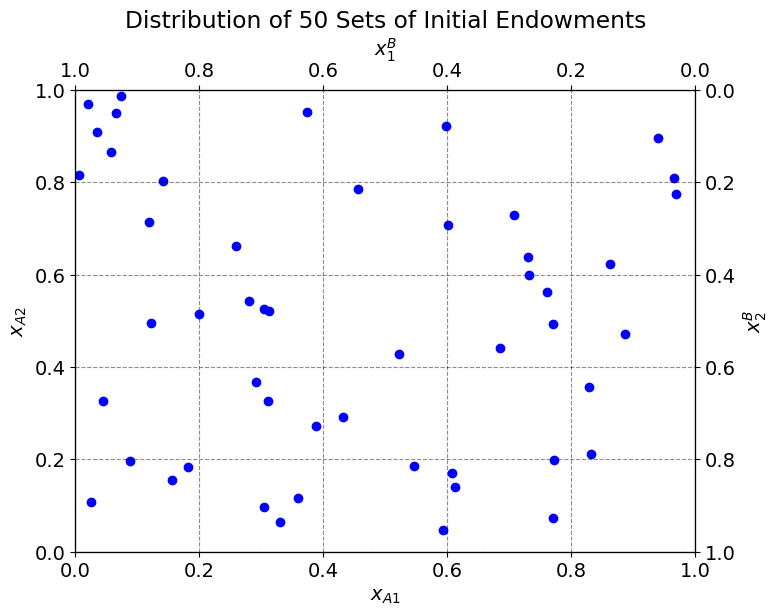

In [14]:
#plotting
plt.figure(figsize=(8, 6))
plt.scatter(W[:, 0], W[:, 1], color='blue', marker='o', label='Initial Endowments $(\omega_{1A}, \omega_{2A})$')
plt.title('Distribution of 50 Sets of Initial Endowments')
plt.xlabel('$x_{A1}$')
plt.ylabel('$x_{A2}$')

plt.xlim(0, 1)
plt.ylim(0, 1)


ax2 = plt.twiny()  
ax3 = plt.twinx()  


ax2.set_xlim(0, 1)
ax3.set_ylim(0, 1)

ax2.set_xlabel('$x_1^B$')
ax3.set_ylabel('$x_2^B$')


ax2.xaxis.set_label_position('top') 
ax3.yaxis.set_label_position('right')
ax2.xaxis.tick_top()
ax3.yaxis.tick_right()
ax2.invert_xaxis()
ax3.invert_yaxis()


plt.grid(True)


plt.show()

# Question 8

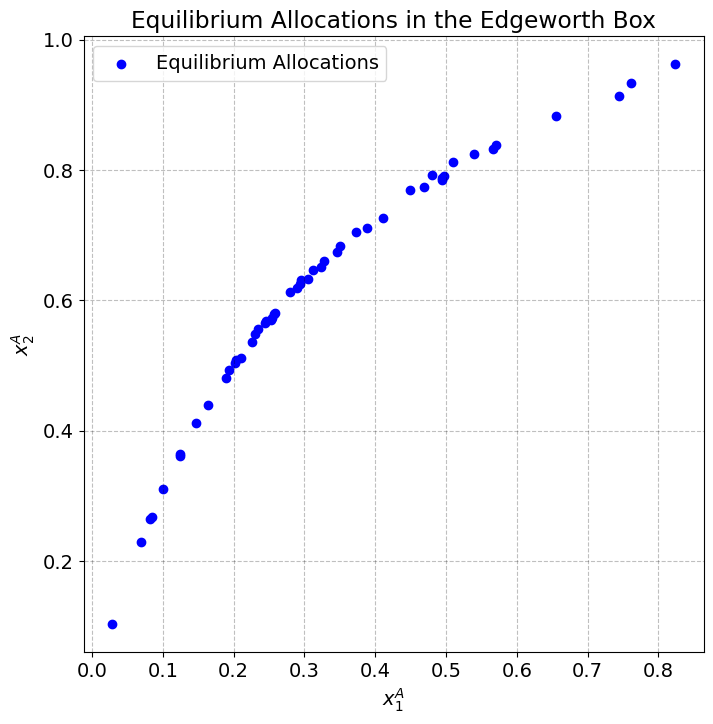

In [15]:
# Define W with 50 random pairs (omega_A1, omega_A2)
np.random.seed(42)
W = np.random.uniform(low=0, high=1, size=(50, 2))

# Initialize model and simulate market equilibria
model = InauguralprojectClass()
equilibrium_allocations = [model.find_equilibrium(w[0], w[1]) for w in W]
x1A_vals = [alloc[0] for alloc in equilibrium_allocations]
x2A_vals = [alloc[1] for alloc in equilibrium_allocations]

# Plotting
plt.figure(figsize=(8, 8))
plt.scatter(x1A_vals, x2A_vals, c='blue', label='Equilibrium Allocations')
plt.title('Equilibrium Allocations in the Edgeworth Box')
plt.xlabel('$x_1^A$')
plt.ylabel('$x_2^A$')
plt.grid(True)
plt.legend()
plt.show()
